# Logistic regression
### Treating the problem as a binary classification problem 4 , apply logistic regression that predicts the if “few” or “many” persons have used a bicycle from all the available numeric features. For one of the two prominent features selected in step a), plot the loss with respect to (y − ŷ).

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, mean_absolute_error
from sklearn.model_selection import train_test_split
%matplotlib inline

In [34]:
df = pd.read_csv('./day.csv', sep=",", quoting=3)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [35]:
df = df.astype(str)
df['cnt']=pd.to_numeric(df['cnt'])

Create two classes 'Few' and 'Many', out of the cnt attribute.

In [15]:
bins = [y.min(), y.median(), y.max()]
df['cnt']=pd.cut(df['cnt'], bins=bins, labels=["few","many"])

Train the lostic regression model.

In [17]:
y=preprocessing.LabelEncoder().fit_transform(list(df['cnt'].values))
X = df.drop(columns=['instant', 'dteday', 'cnt'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Drop all rows that have NA's.
X_train = X_train.dropna(axis=0,how='any')
X_test = X_test.dropna(axis=0,how='any')

logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
y_pred = logisticRegr.predict(X_test)
mae=mean_absolute_error(y_test, y_pred)
print('The mean absolute error is {}%'.format(mae*100))

The mean absolute error is 12.244897959183673%


/home/maria/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Represent the data with seaborn's heatmap, where the well and bad predicted classes are clearly shown.

The error of 12.24% is split between false many-predicted(4.8%) and false few-predicted(8.16%)

42.18% of the total amount of data belong and were well-predicted for the "few" class. 45.58% were well-predicted as "many"

Text(26.5, 0.5, 'Real Class')

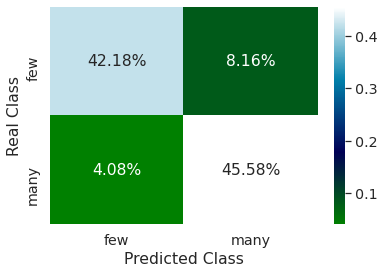

In [32]:
cnf_matrix = confusion_matrix(y_pred, y_test)

fig = plt.figure()
sns.set(font_scale=1.3)
matrix = sns.heatmap(cnf_matrix / np.sum(cnf_matrix), annot=True, xticklabels=class_names, yticklabels=class_names,
                       fmt='.2%', cmap='ocean')
plt.xlabel('Predicted Class')
plt.ylabel('Real Class')